In [1]:
import numpy as np 
import pandas as pd

data = pd.read_csv('RandData1.csv')

df = pd.DataFrame(data)

df.head()

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,2,0,0,1,1400,2900,500,10000,1000,5
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,1,0,0,0,200,1900,400,10000,3000,4
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,1,0,1,500,3600,500,4000,3000,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,1,0,0,1,600,3500,2300,7000,2000,5
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,0,1,1,1,200,2100,2400,4000,5000,4


In [2]:
#preparing effective column called monthly savings

data['Monthly Savings'] = data['Monthly pocketmoney'] - (
    data['Monthly exp on transport'] +
    data['Monthly exp on food'] +
    data['Monthly exp on education'] +
    data['Recurring monthly payments(Subscriptions, plans ,recharge etc.)'] +
    data['Expenses on fresh groceries and whole foods.'] +
    data['expenses on online takeout'] +
    data['expenditure on medicine'] +
    data['expenses on outings'] +
    data['tax payments']
)

# Display the first few rows to verify
data[['Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food', 'Monthly Savings']].head()

,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly Savings
0,10000,8000,4200,-21000
1,8000,5800,3700,-20300
2,9000,2500,800,-8100
3,5000,3100,200,-16400
4,7000,3400,4400,-16300


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#splitting features into features and target

features = data.drop('Monthly Savings', axis=1)
target = data['Monthly Savings']

In [5]:
#defifing features for numeric and categorical datas

numeric_features = ['Age', 'Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food', 
                    'Monthly exp on education', 'Debt', 
                    'Expenses on fresh groceries and whole foods.', 'expenses on online takeout', 
                    'expenditure on medicine', 'expenses on outings', 'tax payments']

categorical_features = ['Gender', 'Place of Stay', 'Relationship status', 'notable investments',
                        'Financial goals', 'Do you follow a monthly budget ?', 'how often do u dine out?',
                        'how often do you make impulse purchases?', 
                        'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
                        'how comfortable are you with taking financial risk in your investments', 
                        'Do you use any mobile apps or online platforms to manage your finances and investments',
                        'what types of food do u spen money on']

In [6]:
#pipelining both numerical and categorical data and prerocessing them

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combine preprocessing with the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

In [7]:
#train test splits

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


In [18]:
X_train.columns

Index(['Age', 'Gender', 'Place of Stay', 'Relationship status',
       'No of dependents', 'Monthly pocketmoney', 'Monthly exp on transport',
       'Monthly exp on food', 'Monthly exp on education',
       'notable investments',
       'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
       'Debt', 'Monthly savings', 'Financial goals',
       'Do you follow a monthly budget ?', 'how often do u dine out?',
       'how often do you make impulse purchases?',
       'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
       'how comfortable are you with taking financial risk in your investments',
       'Do you use any mobile apps or online platforms to manage your finances and investments',
       'Expenses on fresh groceries and whole foods.',
       'expenses on online takeout', 'expenditure on medicine',
       'expenses on outings', 'tax payments',
       'what types of food do u spen money on'],
      dtype='object')

In [23]:
X_test.columns

Index(['Age', 'Gender', 'Place of Stay', 'Relationship status',
       'No of dependents', 'Monthly pocketmoney', 'Monthly exp on transport',
       'Monthly exp on food', 'Monthly exp on education',
       'notable investments',
       'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
       'Debt', 'Monthly savings', 'Financial goals',
       'Do you follow a monthly budget ?', 'how often do u dine out?',
       'how often do you make impulse purchases?',
       'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
       'how comfortable are you with taking financial risk in your investments',
       'Do you use any mobile apps or online platforms to manage your finances and investments',
       'Expenses on fresh groceries and whole foods.',
       'expenses on online takeout', 'expenditure on medicine',
       'expenses on outings', 'tax payments',
       'what types of food do u spen money on'],
      dtype='object')

In [20]:
y_train

56    -10600
5     -20100
122   -13900
113    -8000
93    -20600
       ...  
106   -18200
14    -12500
92    -17600
179   -23700
102   -28800
Name: Monthly Savings, Length: 149, dtype: int64

In [8]:
#reference print to view x and y train  

y_train,X_test

(56    -10600
 5     -20100
 122   -13900
 113    -8000
 93    -20600
        ...  
 106   -18200
 14    -12500
 92    -17600
 179   -23700
 102   -28800
 Name: Monthly Savings, Length: 149, dtype: int64,
      Age  Gender  Place of Stay  Relationship status  No of dependents  \
 82    22       0              0                    1                 3   
 15    21       0              1                    1                 5   
 111   21       1              1                    2                 2   
 177   19       1              0                    2                 3   
 76    20       0              1                    2                 5   
 163   19       1              1                    1                 5   
 68    22       0              0                    2                 1   
 67    22       0              0                    2                 2   
 120   19       0              1                    2                 0   
 173   20       1              1             

In [9]:
#Pipelined model with both categorical and numerical data being trained and fitted at the same time

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outings',
                                                   'tax payments']),
                                                 ('...
                                                   'how often do you make '
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor', LinearRegression())])

In [24]:
#predictions

y_pred = model.predict(X_test)
print(y_pred)

[ -7072.81130735 -23310.96580726 -19584.23126905 -25525.0087708
 -24109.96161385 -14997.95248571 -13394.24589987 -11590.45432048
 -13786.7005884  -15397.21922767 -13769.2081886  -21106.69007241
 -14685.48691397 -10878.08410544 -12020.87150164 -15130.75459707
 -15077.47117898 -16891.26932304 -16904.00592317 -10751.2666086
 -21087.59330295 -16351.12758254 -10542.44583876 -17529.49392668
  -7641.27193541  -5177.44061946  -6685.86560985 -13965.02132994
  -6449.26170246 -13149.06783363  -9407.01600216 -13635.5718635
 -25589.47564479 -20188.16496433  -3559.88623506   2670.59020493
 -16515.62225171 -10176.06149418 -15280.92441356  -4077.8100159
 -11119.35475669 -13467.19771452 -22216.18741695  -7158.30710299
 -11905.23000342  -8879.51184347 -20716.96144258 -12643.64173618
 -14323.74382763 -16135.24000569]


In [11]:
#model evaluations

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
mae, mse, r2

(1010.7470795402077, 1428314.9405533615, 0.9573808113264296)

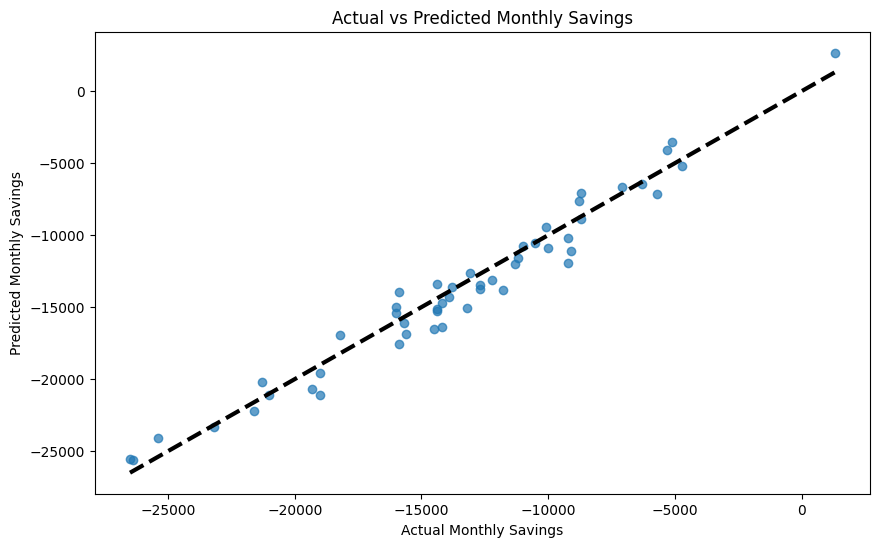

In [13]:
#plot for actual vs predicted savings

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Monthly Savings')
plt.ylabel('Predicted Monthly Savings')
plt.title('Actual vs Predicted Monthly Savings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

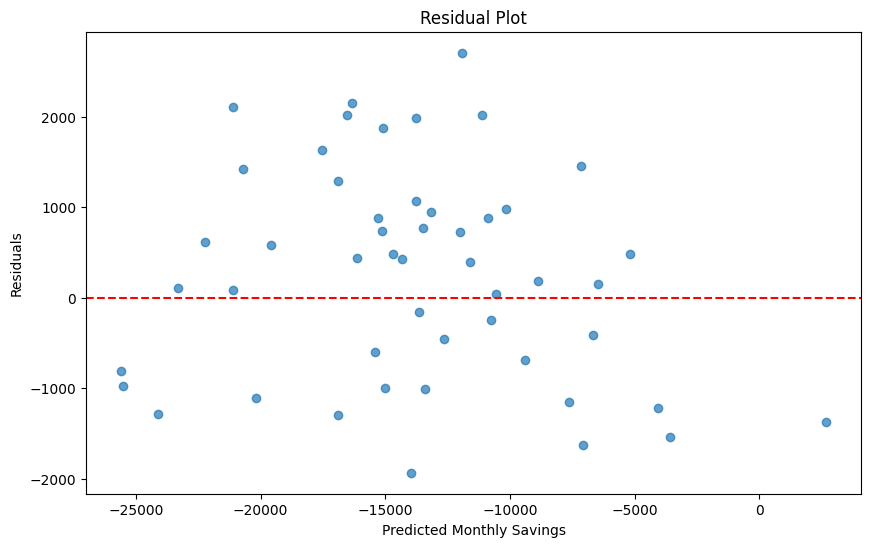

In [14]:
#residual plot 

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Monthly Savings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [15]:
import joblib

joblib.dump(model,'Savings.pkl')

['Savings.pkl']

In [16]:
model = joblib.load('Savings.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outings',
                                                   'tax payments']),
                                                 ('...
                                                   'how often do you make '
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor', LinearRegression())])

In [25]:
new_data_input = {
    'Age': [30],
    'Gender': [1],
    'Place of Stay': [0],
    'Relationship status': [0],
    'No of dependents': [2],
    'Monthly pocketmoney': [3000],
    'Monthly exp on transport': [200],
    'Monthly exp on food': [400],
    'Monthly exp on education': [300],
    'notable investments': [1500],
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100],
    'Debt': [2000],
    'Monthly savings': [500],
    'Financial goals': [10000],
    'Do you follow a monthly budget ?': [0],
    'how often do u dine out?': [1],
    'how often do you make impulse purchases?': [1],
    'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1],
    'how comfortable are you with taking financial risk in your investments': [1],
    'Do you use any mobile apps or online platforms to manage your finances and investments': [1],
    'Expenses on fresh groceries and whole foods.': [150],
    'expenses on online takeout': [50],
    'expenditure on medicine': [20],
    'expenses on outings': [100],
    'tax payments': [500],
    'what types of food do u spen money on': [4]
}

print(new_data_input)


{'Age': [30], 'Gender': [1], 'Place of Stay': [0], 'Relationship status': [0], 'No of dependents': [2], 'Monthly pocketmoney': [3000], 'Monthly exp on transport': [200], 'Monthly exp on food': [400], 'Monthly exp on education': [300], 'notable investments': [1500], 'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100], 'Debt': [2000], 'Monthly savings': [500], 'Financial goals': [10000], 'Do you follow a monthly budget ?': [0], 'how often do u dine out?': [1], 'how often do you make impulse purchases?': [1], 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1], 'how comfortable are you with taking financial risk in your investments': [1], 'Do you use any mobile apps or online platforms to manage your finances and investments': [1], 'Expenses on fresh groceries and whole foods.': [150], 'expenses on online takeout': [50], 'expenditure on medicine': [20], 'expenses on outings': [100], 'tax payments': [500], 'what types o

In [26]:
new_data = pd.DataFrame(new_data_input)
new_data

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,30,1,0,0,2,3000,200,400,300,1500,...,1,1,1,1,150,50,20,100,500,4


In [28]:
result = model.predict(new_data)
print("Predicted Monthly Savings : ",result)

Predicted Monthly Savings :  [1146.39187521]
